### Student Details

Student Name: Sajin Mohamed Pallikkathodi Erathali

Student ID: 23037601


# Task 2: scikit learn

In [39]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt

1.	Read the iris dataset using Pandas (ref Option 2 above)
2.	Extract the Iris-setosa and Iris-verginica samples only
3.	Extract the petal length and petal width. These shall be our features.

In [40]:
import pandas as pd
df = pd.read_csv('iris_data.csv', header=0)

# dataframe containing only Iris-setosa and Iris-virginica filterd out of df
iris_setosa_df = df.loc[(df[' class'] == "Iris-setosa")]
iris_virginica_df = df.loc[(df[' class'] == "Iris-virginica")]

column_mapping = {                          # creating an mapping of the columns so as to create neater column name without the leading space
    ' petal_length': 'petal_length',
    ' petal_width': 'petal_width',
    ' class' : 'class'
}

filtered_df = df.loc[(df[' class'] == "Iris-setosa") | (df[' class'] == "Iris-virginica")]
# Use the rename method to rename columns
filtered_df = filtered_df.rename(columns=column_mapping)   # applying the mapping
iris_setosa_df = iris_setosa_df.rename(columns=column_mapping)
iris_virginica_df = iris_virginica_df.rename(columns=column_mapping)

# # petal_length and petal_width selected as features
X = filtered_df.iloc[:, [2, 3]]


4.	Plot the dataset as a scatter plot with the two Iris types shown as different colours

50


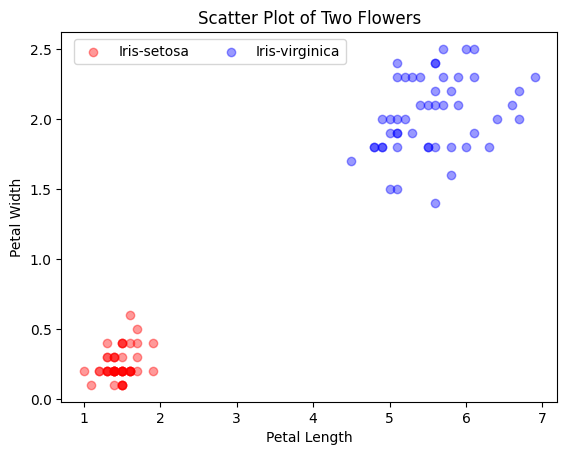

In [41]:
################################
# Your code here
colors = ['red', 'blue']

# separating out the two to be plotted on the scatter plot with the LEGEND
iris_setosa_petal_param = iris_setosa_df.iloc[:, [2,3]]
iris_virginica_petal_param = iris_virginica_df.iloc[:, [2,3]]

print(len(iris_setosa_petal_param))

plt.scatter(iris_setosa_petal_param['petal_length'], # red
            iris_setosa_petal_param['petal_width'], 
            color = colors[0], 
            label = 'Iris-setosa', alpha= .4)
plt.scatter(iris_virginica_petal_param['petal_length'], # blue
            iris_virginica_petal_param['petal_width'], 
            color = colors[1], 
            label = 'Iris-virginica', alpha= .4)
plt.legend(loc='upper center', bbox_to_anchor=(0.3, 1), 
           ncol=2)

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter Plot of Two Flowers')
# plotting the graph with the flower types highlighed in the LEGEND
plt.show()


An alternate way to plot the graph, however has no legend. In the later code I have introduced a way to add legend to this map.

{'Iris-setosa': 0, 'Iris-virginica': 1}


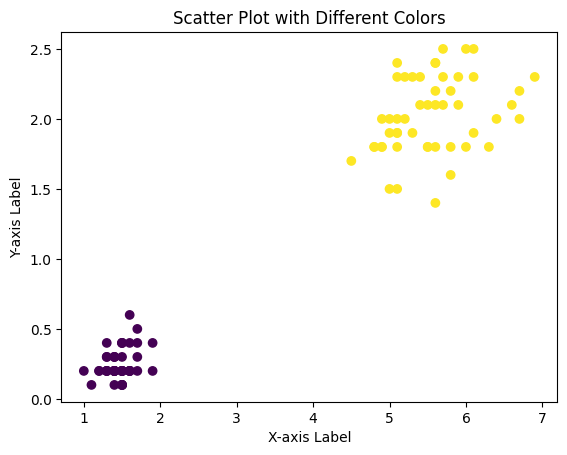

In [42]:
import matplotlib.pyplot as plt


# Define a color map based on unique values in 'filtered_df['class']'
unique_colors = filtered_df['class'].unique()
color_map = {color: i for i, color in enumerate(unique_colors)}
print(color_map)

# Create a scatter plot with colors based on 'filtered_df['class']'
plt.scatter(filtered_df.iloc[:, 2], filtered_df.iloc[:, 3], c=filtered_df['class'].map(color_map)) # approach not suitable since we do not have the legend to identify which color maps to which flower
# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot with Different Colors')

# Show the plot
plt.show()


5.	Use the perceptron in sklearn.linear_model to train on the Iris data previously used. Set verbose = 1; have a look at the epochs, it converges very quickly?

In [43]:
# So as not to confuse with our previously defined Perceptron class
from sklearn.linear_model import Perceptron as Perceptron 
from sklearn.model_selection import train_test_split
################################
# Your code here
y = filtered_df['class'] # resetting the data back to Iris data previously used

ppn = Perceptron(verbose=1) # using the perceptron defined by sklearn.linear_model with verbose = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ppn.fit(X_train, y_train) # fitting data to model

y_pred = ppn.predict(X_test) # getting the predicted data


-- Epoch 1
Norm: 1.92, NNZs: 2, Bias: -3.000000, T: 80, Avg. loss: 0.334625
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.92, NNZs: 2, Bias: -3.000000, T: 160, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.92, NNZs: 2, Bias: -3.000000, T: 240, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.92, NNZs: 2, Bias: -3.000000, T: 320, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.92, NNZs: 2, Bias: -3.000000, T: 400, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.92, NNZs: 2, Bias: -3.000000, T: 480, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.92, NNZs: 2, Bias: -3.000000, T: 560, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds


### It converges very quickly(after 7 epochs) due to its features being diverse and on different regions of the scatter plot and are easily separable.

In [44]:
from sklearn.metrics import accuracy_score

print("The accuracy score is", accuracy_score(y_test, y_pred)) # calculating accuracy

The accuracy score is 1.0


6.	Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary for the feature scaled case

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


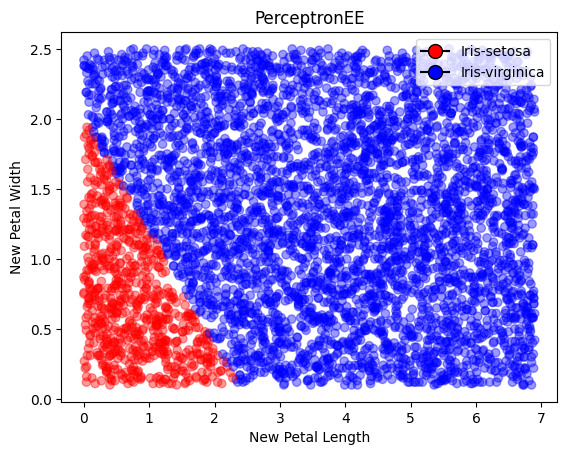

In [45]:
import random

################################
# Your code here
np.random.seed(42)
new_petal_length = np.random.uniform(0, 6.9, size=(5000)) # choosing uniform distribution to create sample heights and weights
new_petal_length = np.round(new_petal_length, 3) # rounding the values obtained
new_petal_width = np.random.uniform(0.1, 2.5, size=(5000))
new_petal_width = np.round(new_petal_width, 2)

new_X = np.column_stack((new_petal_length, new_petal_width))
new_y_pred = ppn.predict(new_X)    

colormap = {'Iris-setosa': 'red', 'Iris-virginica': 'blue'}
plt.scatter(new_petal_length, new_petal_width, c=[colormap[pred] for pred in new_y_pred], alpha=.4) # we maintain the same color mapping we used earlier using colormap to maintain the understanding of the data.

# a way to provide legend when handling scatter plot, here we take the colormap we created and iterate
# through them and say which label corresponds to which item
legend_handles = [plt.Line2D([0], [0], marker='o', color='black', label=pred, markersize=10, 
                             markerfacecolor=color) 
                             for pred, color in colormap.items()]

# Add the legend to the plot
plt.legend(handles=legend_handles, loc='upper right')

plt.title('PerceptronEE')
plt.xlabel('New Petal Length')
plt.ylabel('New Petal Width')
plt.show()

we can see a clear decision boundary as intuition would suggest. The decision boundary mimics the decision boundary that can be drawn for the previous scatter plot as well

## Commonality and differences between artificial neurons and biological neurons

The obvious similarity between artificial neural network and the brain is the presence of neurons, however the way in which they process information may vary. The biological neurons are composed of dendrites, through which the input is taken and then passed to the nucleus and if the signals pass a threshold then the output is passed through the axon to the next neuron. As per studies the dentrites themselves apply a non-linear function on the input before sending the signal to the nucleus to be aggregated. In Artificial Neural Network, the input is directly passed to a neuron from another through an activation function and the output is taken as it is passed. 

 
In biological neurons, if the signals aggregated by the nucleus is over a threshold, the axon transmits a high voltage(action potential) and the cell may not be triggered for a brief period called refractory period. While artificial neurons have the capacity to provide outputs of a continuous nature, the biological neurons only give the output in binary format(ie. Action potential is either triggered or not). The artificial neuron processes continuous inputs and generates outputs using activation functions. These functions are similar to the non-linear functions used by dendrites. In Artificial Neural Networks, the functions such as sigmoid, hyperbolic tangent etc. are used. Because they had vanishing gradient problem, Rectified Linear unit(ReLu) functions overcomes this enabling efficient learning. The artificial neurons typically produce outputs ranging from 0 to 1. The following illustrates the key differences and similarities between these.

 
1. The transmission of information is also different since in a biological network the nervous system encodes the information at the frequency of transmission. This is entirely different from the encoding done on the artificial neural networks which use encoding like one-hot encoding. Unlike biological neurons, artificial neurons do not encode information in signal frequency or firing rates, but are conveyed through weights. Additionally, artificial neurons within the same layer work synchronously, transmitting and receiving signals simultaneously. Simulating loops and time-dependent processes often require Recurrent Neural Network(RNN) or LSTMs which are not equivalent to biological neurons. Hence, the output provided by artificial neurons and biological neurons are different.
 

2. Learning is another area in which they have differences. ANNs use gradient descent to reach a global minimum to reduce the errors(loss function) and the backpropogation along with the activation function helps it learn. However, biological neurons use a different learning method called Hebbian learning where in the efficiency of one neuron being able to pass information to another to use. Say, if one neuron is always triggered right after the input reaches another neuron, then the connection is strengthened ie. There is always a passage of information via the neurons and if due to a certain stimulus if the input spike of second neuron happens right before the output spike of the first, then the strength of the connection is weakened. Hence, by weakening and strengthening its connections its able to learn new things.
 
Because of the above mentioned feature, the ability of a brain to adapt to new learnings without having training on it based on the data is one of the reasons that humans can take up a similar skill in very less time. On the other hand for a ANN to achieve this, we would need to provide a lot of data through which it has to adjust the weights(fine tuning).
 
3. Another difference is that if you provide the same input to the same neural network it would provide you the same output. However, the biological network would not do so, which is attributed to “human error”. The Convolutional Neural Network(CNN)s that is used world-wide in the domain of image processing is modelled after findings from the visual system such as edge detection, and the pooling of data from different cells to identify targets.  
 

4. The connection pathways in ANNs are typically simpler and determined by architecture, however, in biological neural networks its complex and diverse.  


5.  Speed is another area of difference biological neurons fire about 200 times per second on average. Here this is an average calculation since the firing frequency and the speed at which information transmits vary from person to person depending on various factors like age, height, temperature, medical conditions and the conditions that the human is subjected to daily. However, the information is carried by artificial neurons in continuous floating point number and apply a simple non-linear differentiable function(activation function) based on the sum of its weighted inputs. There are no refractory periods for artificial networks(time required to obtain optimum performance from fatigue).  

 
6.  Size of the brain in terms of the neurons and synapses() far exceed the artificial neurons(the human brain has about 86 billion neurons and over a 100 trillion synapses). Even though their numbers are less they are significant in performance. If we talk about a single perceptron network, it has a network of perceptrons all doing the same task at once. The Deep Neural Network(DNN) has a set of input neurons and a set of output neurons and a set of hidden layer of neurons which are all interconnected(usually). This means that the artificial neurons have as many connections as the connections of the layer before it and after it possesses.  
 

7. Power consumption is an area where biological neurons far out-perform the artificial neurons. Only 20% of human body’s energy is taken by the brain. Despite its usage it only operates on about 20W, which is barely enough to power a light bulb and yet it is extremely efficient. However, a GPU takes about 250W which is over 10 times more. Hence brain is way more efficient when compared to machines.  
 

In summary, there is a lot of improvements that can be done to artificial neurons, even though the current thinking of artificial neuron’s architecture would not work with adapting model of the biological neurons efficiently due to computational overhead. However, since the field of quantum computing is an emerging one, what can be done is only limited by the way of thinking of humans.  

 
 
https://towardsdatascience.com/the-differences-between-artificial-and-biological-neural-networks-a8b46db828b7  
https://www.geeksforgeeks.org/difference-between-ann-and-bnn/  
https://medium.com/@eraiitk/brain-and-artificial-neural-networks-differences-and-similarities-1d337fe50168  
https://news.sophos.com/en-us/2017/09/21/man-vs-machine-comparing-artificial-and-biological-neural-networks/  
